## **1. Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import platform

## **2. Data**

In [ ]:
# 데이터 불러온 후, 필요없는 행 삭제
df = pd.read_csv('.\\datas\\report.txt', sep='\t')
df = df.drop(index=[0, 1, 2]).reset_index(drop=True)
df.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,2020.1/4,종로구,"74,151","161,984","78,271","83,713","151,217","73,704","77,513","10,767","4,567","6,200",2.04,"28,073"
1,2020.1/4,중구,"63,045","136,469","66,769","69,700","126,175","61,839","64,336","10,294","4,930","5,364",2,"23,794"
2,2020.1/4,용산구,"110,895","246,165","119,961","126,204","229,579","110,667","118,912","16,586","9,294","7,292",2.07,"39,439"
3,2020.1/4,성동구,"135,643","307,193","149,891","157,302","299,042","146,300","152,742","8,151","3,591","4,560",2.2,"44,728"
4,2020.1/4,광진구,"165,287","365,990","176,226","189,764","350,417","169,568","180,849","15,573","6,658","8,915",2.12,"48,989"


In [4]:
df.columns = ['기간', '자치구', '세대', '합계', '남자', '여자', '한국인 계', '한국인 남자', '한국인 여자', '등록외국인 계', '등록외국인 남자', '등록외국인 여자', '세대당인구', '65세이상고령자']
df.head()

,기간,자치구,세대,합계,남자,여자,한국인 계,한국인 남자,한국인 여자,등록외국인 계,등록외국인 남자,등록외국인 여자,세대당인구,65세이상고령자
0,2020.1/4,종로구,"74,151","161,984","78,271","83,713","151,217","73,704","77,513","10,767","4,567","6,200",2.04,"28,073"
1,2020.1/4,중구,"63,045","136,469","66,769","69,700","126,175","61,839","64,336","10,294","4,930","5,364",2,"23,794"
2,2020.1/4,용산구,"110,895","246,165","119,961","126,204","229,579","110,667","118,912","16,586","9,294","7,292",2.07,"39,439"
3,2020.1/4,성동구,"135,643","307,193","149,891","157,302","299,042","146,300","152,742","8,151","3,591","4,560",2.2,"44,728"
4,2020.1/4,광진구,"165,287","365,990","176,226","189,764","350,417","169,568","180,849","15,573","6,658","8,915",2.12,"48,989"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   기간        25 non-null     object
 1   자치구       25 non-null     object
 2   세대        25 non-null     object
 3   합계        25 non-null     object
 4   남자        25 non-null     object
 5   여자        25 non-null     object
 6   한국인 계     25 non-null     object
 7   한국인 남자    25 non-null     object
 8   한국인 여자    25 non-null     object
 9   등록외국인 계   25 non-null     object
 10  등록외국인 남자  25 non-null     object
 11  등록외국인 여자  25 non-null     object
 12  세대당인구     25 non-null     object
 13  65세이상고령자  25 non-null     object
dtypes: object(14)
memory usage: 2.9+ KB


## **3. Functions**

## **4. EDA**

In [6]:
# 천단위 구분자 ',' 제거 후, data type 변경
target_cols = ['세대', '합계', '남자', '여자', '한국인 계', 
               '한국인 남자', '한국인 여자', '등록외국인 계', 
               '등록외국인 남자', '등록외국인 여자', '65세이상고령자']

for col in target_cols:
    df[col] = df[col].str.replace(',', '').astype(np.int64)

df.head()

,기간,자치구,세대,합계,남자,여자,한국인 계,한국인 남자,한국인 여자,등록외국인 계,등록외국인 남자,등록외국인 여자,세대당인구,65세이상고령자
0,2020.1/4,종로구,74151,161984,78271,83713,151217,73704,77513,10767,4567,6200,2.04,28073
1,2020.1/4,중구,63045,136469,66769,69700,126175,61839,64336,10294,4930,5364,2,23794
2,2020.1/4,용산구,110895,246165,119961,126204,229579,110667,118912,16586,9294,7292,2.07,39439
3,2020.1/4,성동구,135643,307193,149891,157302,299042,146300,152742,8151,3591,4560,2.2,44728
4,2020.1/4,광진구,165287,365990,176226,189764,350417,169568,180849,15573,6658,8915,2.12,48989


In [7]:
df['세대당인구'] = df['세대당인구'].astype(np.float64)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기간        25 non-null     object 
 1   자치구       25 non-null     object 
 2   세대        25 non-null     int64  
 3   합계        25 non-null     int64  
 4   남자        25 non-null     int64  
 5   여자        25 non-null     int64  
 6   한국인 계     25 non-null     int64  
 7   한국인 남자    25 non-null     int64  
 8   한국인 여자    25 non-null     int64  
 9   등록외국인 계   25 non-null     int64  
 10  등록외국인 남자  25 non-null     int64  
 11  등록외국인 여자  25 non-null     int64  
 12  세대당인구     25 non-null     float64
 13  65세이상고령자  25 non-null     int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 2.9+ KB


In [9]:
# 각 자치구에 따른 권역 컬럼 추가
region_dict = {'도심권': ['종로구', '중구', '용산구'],
               '동북권': ['성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구'],
               '서북권': ['은평구', '서대문구', '마포구'],
               '서남권': ['양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', '관악구'],
               '동남권': ['서초구', '강남구', '송파구', '강동구']
               }

def get_region(gu):
    for region, gu_list in region_dict.items():
        if gu in gu_list:
            return region
        
df['권역'] = df['자치구'].apply(get_region)
df.head()

,기간,자치구,세대,합계,남자,여자,한국인 계,한국인 남자,한국인 여자,등록외국인 계,등록외국인 남자,등록외국인 여자,세대당인구,65세이상고령자,권역
0,2020.1/4,종로구,74151,161984,78271,83713,151217,73704,77513,10767,4567,6200,2.04,28073,도심권
1,2020.1/4,중구,63045,136469,66769,69700,126175,61839,64336,10294,4930,5364,2.00,23794,도심권
2,2020.1/4,용산구,110895,246165,119961,126204,229579,110667,118912,16586,9294,7292,2.07,39439,도심권
3,2020.1/4,성동구,135643,307193,149891,157302,299042,146300,152742,8151,3591,4560,2.20,44728,동북권
4,2020.1/4,광진구,165287,365990,176226,189764,350417,169568,180849,15573,6658,8915,2.12,48989,동북권


In [ ]:
# pivot table을 활용하여 권역별
# 합계, 세대, 여자, 한국인 계, 등록외국인 계, 65세이상고령자 합 구하기
target_cols = ['합계', '세대', '여자', '한국인 계', '등록외국인 계', '65세이상고령자']

df_pivot = pd.pivot_table(df,
                          index='권역',
                          values=target_cols,
                          aggfunc='sum')

df_pivot = df_pivot.sort_values(by='합계', ascending=False)

df_pivot

,65세이상고령자,등록외국인 계,세대,여자,한국인 계,합계
권역,,,,,,
동북권,497385,67938,1342778,1580313,3008988,3076926
서남권,454108,124791,1360162,1554745,2950352,3075143
동남권,286874,20511,876524,1097300,2102113,2122624
서북권,188566,29239,526451,626811,1165231,1194470
도심권,91306,37647,248091,279617,506971,544618


In [11]:
# pivot table에 고령자비율, 외국인비율, 여성비율, 세대당인구 추가하기
df_pivot['고령자비율'] = df_pivot['65세이상고령자'] / df_pivot['합계'] * 100
df_pivot['외국인비율'] = df_pivot['등록외국인 계'] / df_pivot['합계'] * 100
df_pivot['여성비율'] = df_pivot['여자'] / df_pivot['합계'] * 100
df_pivot['세대당인구'] = (df_pivot['합계'] - df_pivot['등록외국인 계']) / df_pivot['세대']

df_pivot = df_pivot.sort_values(by='외국인비율', ascending=True)

df_pivot

,65세이상고령자,등록외국인 계,세대,여자,한국인 계,합계,고령자비율,외국인비율,여성비율,세대당인구
권역,,,,,,,,,,
동남권,286874,20511,876524,1097300,2102113,2122624,13.515064,0.966304,51.695449,2.398238
동북권,497385,67938,1342778,1580313,3008988,3076926,16.164997,2.207983,51.360124,2.240868
서북권,188566,29239,526451,626811,1165231,1194470,15.786583,2.447864,52.476077,2.213370
서남권,454108,124791,1360162,1554745,2950352,3075143,14.767053,4.058055,50.558462,2.169118
도심권,91306,37647,248091,279617,506971,544618,16.765145,6.912552,51.341858,2.043488


In [12]:
# 원본 데이터에 고령자비율, 외국인비율, 여성비율 컬럼 추가하기
df['고령자비율'] = df['65세이상고령자'] / df['합계'] * 100
df['외국인비율'] = df['등록외국인 계'] / df['합계'] * 100
df['여성비율'] = df['여자'] / df['합계'] * 100

df = df.sort_values(by='세대당인구', ascending=False)

df.head()

,기간,자치구,세대,합계,남자,여자,한국인 계,한국인 남자,한국인 여자,등록외국인 계,등록외국인 남자,등록외국인 여자,세대당인구,65세이상고령자,권역,고령자비율,외국인비율,여성비율
14,2020.1/4,양천구,177436,460532,226109,234423,456339,224241,232098,4193,1868,2325,2.57,62761,서남권,13.627935,0.910469,50.902652
21,2020.1/4,서초구,173580,434801,207877,226924,430568,205787,224781,4233,2090,2143,2.48,58332,동남권,13.415793,0.973549,52.190312
10,2020.1/4,노원구,217148,535495,258696,276799,531037,256726,274311,4458,1970,2488,2.45,82682,동북권,15.440294,0.832501,51.690305
23,2020.1/4,송파구,279301,680883,329058,351825,674095,325859,348236,6788,3199,3589,2.41,89539,동남권,13.150424,0.996941,51.671873
9,2020.1/4,도봉구,138595,333495,162774,170721,331238,161879,169359,2257,895,1362,2.39,60023,동북권,17.998171,0.676772,51.191472


In [ ]:
# 피봇 테이블에서 고령자비율, 외국인비율, 여성비율, 세대당인구 간의
# 피어슨 상관계수 행렬 구하기
corr_cols = ['고령자비율', '외국인비율', '여성비율', '세대당인구']

pivot_corr = df_pivot[corr_cols].corr()

pivot_corr

,고령자비율,외국인비율,여성비율,세대당인구
고령자비율,1.000000,0.655428,0.079476,-0.809536
외국인비율,0.655428,1.000000,-0.380941,-0.943776
여성비율,0.079476,-0.380941,1.000000,0.283602
세대당인구,-0.809536,-0.943776,0.283602,1.000000


## **5. Visualization**

In [14]:
# 한글 설정
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

get_ipython().run_line_magic("matplotlib", "inline")

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)

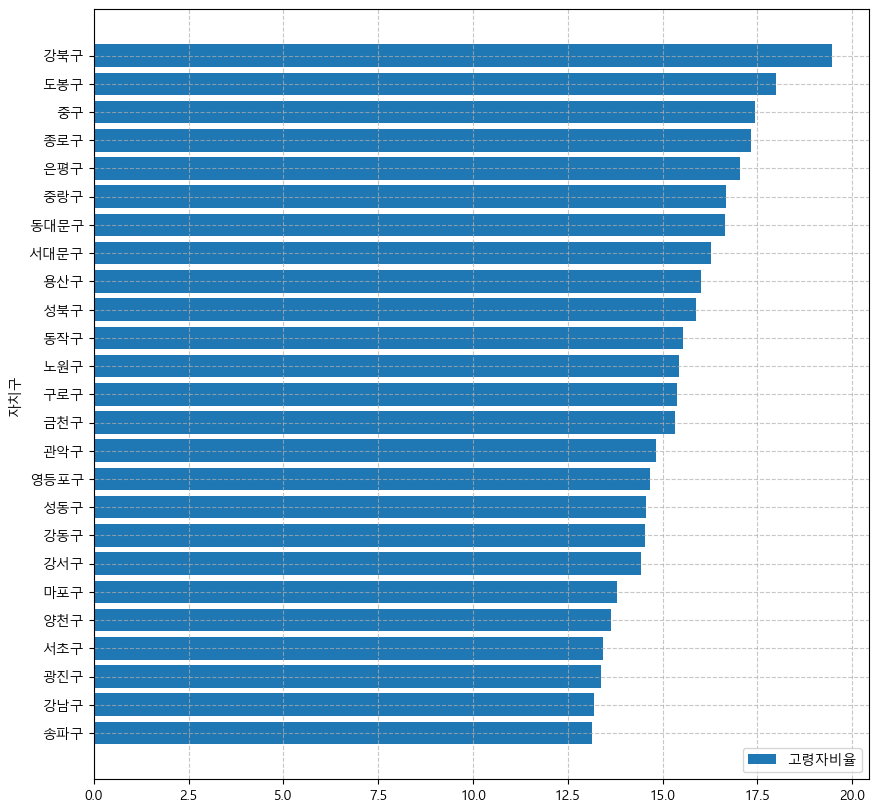

In [ ]:
# 자치구별 고령자비율 barh 그래프 그리기
sorted_df_by_old_percentage = df.sort_values('고령자비율', ascending=True)

plt.figure(figsize=(10, 10))
plt.barh(width=sorted_df_by_old_percentage['고령자비율'],
         y=sorted_df_by_old_percentage['자치구'],
         label='고령자비율')

plt.ylabel('자치구')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.legend(loc='lower right')
plt.show()

In [16]:
# 권역별 등록외국인 계 파이차트로 시각화
grouped_df = df.groupby('권역')['등록외국인 계'].sum()
grouped_df

권역
도심권     37647
동남권     20511
동북권     67938
서남권    124791
서북권     29239
Name: 등록외국인 계, dtype: int64

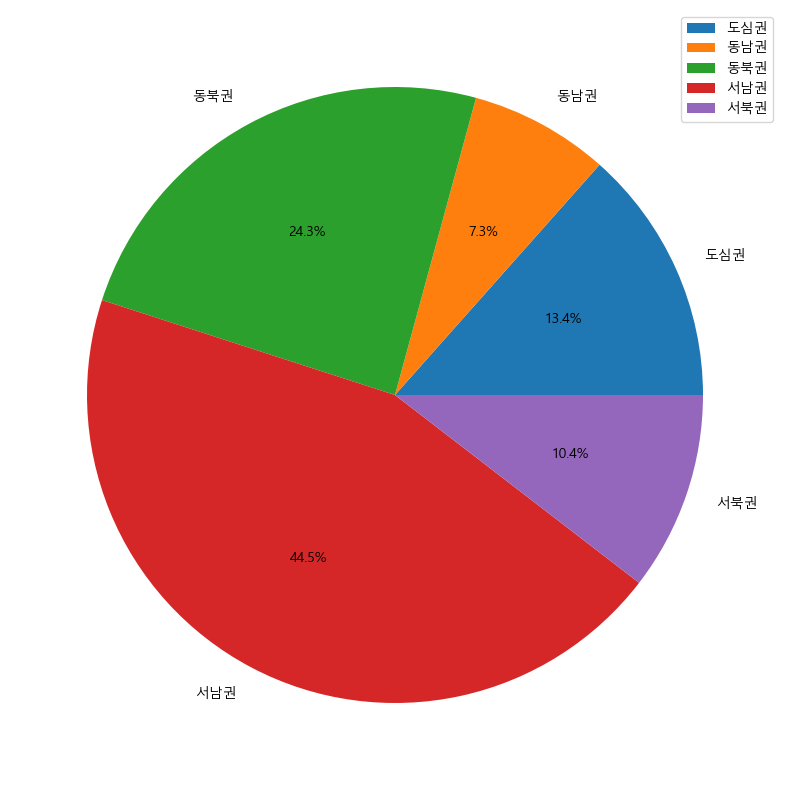

In [17]:
plt.figure(figsize=(10, 10))
plt.pie(grouped_df,
        labels=grouped_df.index,
        autopct='%.1f%%')

plt.legend()
plt.show()

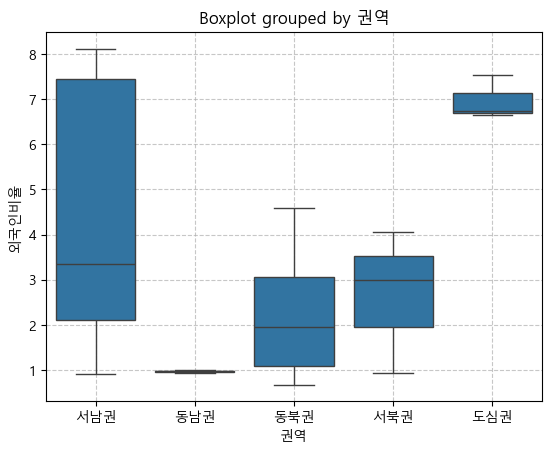

In [18]:
# 권역별 외국인비율 박스플랏으로 시각화
sns.boxplot(data=df, x='권역', y='외국인비율')

plt.title('Boxplot grouped by 권역')
plt.xlabel('권역')
plt.ylabel('외국인비율')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

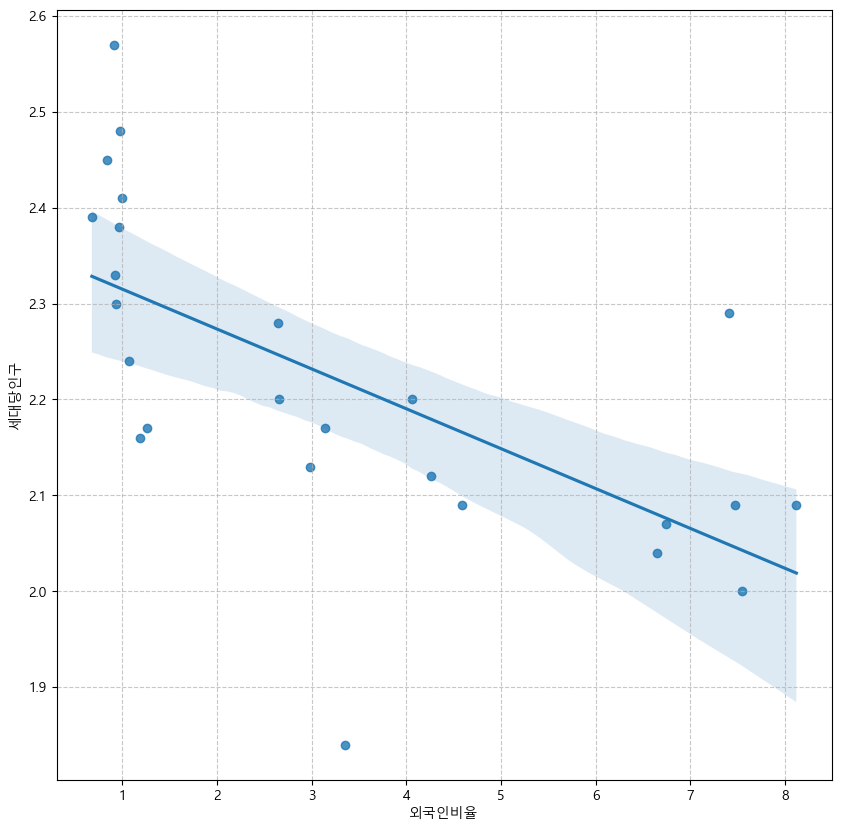

In [19]:
# 자치구별 외국인비율-세대당인구를 산점도에 나타내고
# 상관관계에 따른 Regression Line 시각화
plt.figure(figsize=(10, 10))

sns.regplot(data=df,
            x='외국인비율',
            y='세대당인구')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()